<a href="https://colab.research.google.com/github/gsc16/MachineLearning/blob/master/hw1q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import keras
from keras.datasets import mnist
from keras import models
from keras import layers
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.


Loading images from MNIST dataset

In [0]:
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Displaying original values

In [3]:
train_images_original.shape, train_labels_original, test_images_original.shape, test_labels_original.shape

((60000, 28, 28),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 (10000, 28, 28),
 (10000,))

Extracting images

In [0]:
train_images_new = (train_images_original.reshape(60000,28 * 28))
train_images_new = train_images_new.astype('float32')/255


test_images_new = (test_images_original.reshape(10000,28 * 28))
test_images_new = test_images_new.astype('float32')/255

Converting integer vectors to binary

In [0]:
train_labels_new = (keras.utils.to_categorical(train_labels_original,10))
y_c = test_labels_original
test_labels_new = (keras.utils.to_categorical(test_labels_original,10))

Displaying the new values

In [6]:
train_images_new.shape, train_labels_new.shape, test_images_new.shape, test_labels_new.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

Creating network

In [0]:
network = models.Sequential()
network.add(layers.Dense(10, activation='softmax'))

Compilation

In [8]:
network.compile(optimizer=keras.optimizers.SGD(lr = 0.01),loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Training

In [9]:
model = network.fit(train_images_new, 
                      train_labels_new, 
                      epochs= 10, 
                      batch_size= 10, 
                      validation_data=(test_images_new, test_labels_new))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.5441 - acc: 0.8598 - val_loss: 0.3667 - val_acc: 0.9012
Epoch 2/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.3620 - acc: 0.8996 - val_loss: 0.3249 - val_acc: 0.9107
Epoch 3/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.3330 - acc: 0.9065 - val_loss: 0.3098 - val_acc: 0.9155
Epoch 4/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.3177 - acc: 0.9108 - val_loss: 0.2998 - val_acc: 0.9174
Epoch 5/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.3079 - acc: 0.9142 - val_loss: 0.2957 - val_acc: 0.9167
Epoch 6/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.3011 - acc: 0.9156 - val_loss: 0.2902 - val_acc: 0.9169
Epoch 7/10
60000/60000 [==============================] - 6s 106us/step - 

Display loss

Test loss: 0.27894000512063505
Test accuracy: 0.9211


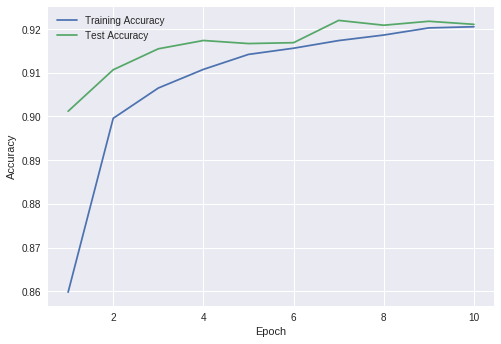

In [10]:
metrics = network.evaluate(test_images_new, test_labels_new, verbose=0)
print('Test loss:', metrics[0])
print('Test accuracy:', metrics[1])

accuracyplot = plt.plot(range(1,11),model.history['acc'],range(1,11),model.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Training Accuracy','Test Accuracy'))
plt.show(accuracyplot)